In [1]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
import xgboost as xgb
import pandas as pd
    
from tensorflow.keras.models import Sequential

In [2]:
df = read_csv('./train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df = df.fillna(0) 
df = pd.get_dummies(df)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
traindataset = df.copy()

In [9]:
X = traindataset.drop(['SalePrice', 'Id'], axis=1)
Y = traindataset['SalePrice']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=123)

In [11]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.849315,58.324486,10353.034247,6.093322,5.583904,1970.898973,1985.007705,102.970890,447.009418,46.425514,...,0.003425,0.082192,0.002568,0.865582,0.071918,0.002568,0.007705,0.012842,0.820205,0.084760
std,42.462802,33.294871,9411.800862,1.402296,1.129862,30.397482,20.538695,178.226075,465.733256,165.017990,...,0.058445,0.274774,0.050637,0.341247,0.258462,0.050637,0.087479,0.112643,0.384181,0.278644
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,44.000000,7538.750000,5.000000,5.000000,1953.750000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,64.000000,9452.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,381.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11604.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,713.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 318 to 1389
Columns: 304 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(268)
memory usage: 643.3 KB


In [13]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

[12:02:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\utilisateur\Anaconda3\envs\HP\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [14]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_train)

In [15]:
mean_absolute_error(y_train, y_pred)

10544.300647474314

In [16]:
from sklearn.metrics import mean_squared_error
rmsle = np.sqrt(mean_squared_error(np.log(y_train), np.log(y_pred)))

In [17]:
rmsle

0.09156319459845493

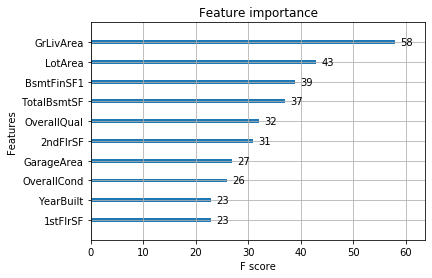

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, max_num_features=10)
plt.show()

In [19]:
cols = ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallQual', '2ndFlrSF', 'GarageArea', 'OverallCond', 'YearBuilt', '1stFlrSF']
X2 = traindataset[cols]

In [20]:
#X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, Y, test_size=0.2, random_state=123)

In [21]:
#model = xgb.XGBRegressor()
#model.fit(X_train2, y_train2)

In [22]:
#y_pred2 = model.predict(X2)

In [23]:
#mean_absolute_error(Y, y_pred2)

In [24]:
kaggleDataset = read_csv('./kaggletest.csv')
df1 = read_csv('./test.csv')

In [25]:
kaggledataset_Id = df1['Id']

In [26]:
kaggleDataset = kaggleDataset.copy()
kaggleDataset = kaggleDataset.fillna(0) 
kaggleDataset = pd.get_dummies(kaggleDataset)

In [27]:
kaggleDataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,57.910212,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,438.902673,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,421.321334,42.746880,32.266054,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.257119,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,1461.000000,20.000000,0.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,20.000000,44.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2190.000000,50.000000,63.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2554.500000,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
missing_col = list(set(X_train.columns) - set(kaggleDataset.columns))
for col in missing_col:
    kaggleDataset[col] = 0
kaggleDataset = kaggleDataset[X_train.columns]
print(X_train.shape)
print(kaggleDataset.shape)

(1168, 304)
(1459, 304)


In [29]:
kaggleDataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,57.910212,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,438.902673,52.583276,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,42.746880,32.266054,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.257119,176.698671,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,20.000000,0.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,44.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,63.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
kaggleDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 304 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(44), uint8(249)
memory usage: 981.8 KB


In [31]:
from sklearn.metrics import mean_absolute_error
y_pred_kaggle = model.predict(kaggleDataset)

In [32]:
y_pred_kaggle = pd.DataFrame(y_pred_kaggle)

In [34]:
kaggledataset_Id = pd.DataFrame(kaggledataset_Id)

In [35]:
sub = kaggledataset_Id.join(y_pred_kaggle)

In [36]:
sub.head(5)

,Id,0
0,1461,121499.601562
1,1462,169345.656250
2,1463,172755.640625
3,1464,176760.078125
4,1465,186746.781250


In [37]:
col_names_sub = sub.columns.values
col_names_sub[1] = 'SalePrice'
sub.columns = col_names_sub
sub.head(5)

,Id,SalePrice
0,1461,121499.601562
1,1462,169345.656250
2,1463,172755.640625
3,1464,176760.078125
4,1465,186746.781250


In [39]:
sub.to_csv('HPKaggleBase.csv', index = False)

This Notebook gives a kaggle score of 0.13429 and runs the same on every machine (My friend Aro tested it on 20/12/2019 and got the same score)